In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
168,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
880,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
1675,59,1,0,170,197,0,1,130,1,1.6,1,0,3,0
1290,68,0,2,126,215,0,0,150,0,0.0,1,0,2,1


In [ ]:
df.target.value_counts()

1    1083
0     967
Name: target, dtype: int64

In [ ]:
Q1 = np.percentile(df['trestbps'], 25, method='midpoint')
Q3 = np.percentile(df['trestbps'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['trestbps']>=upper)[0]
lower_array = np.where(df['trestbps']<=lower)[0]
df.drop(index=upper_array,inplace=True)
df.drop(index=lower_array, inplace=True)


Q1 = np.percentile(df['restecg'], 25, method='midpoint')
Q3 = np.percentile(df['restecg'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['restecg']>=upper)[0]
lower_array = np.where(df['restecg']<=lower)[0]
df.drop(index=upper_array,inplace=True)
df.drop(index=lower_array, inplace=True)

20.0
1.0


In [ ]:
X = df.drop('target',axis=1)
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=df.target)

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

RandomForest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(rf_accuracy)

0.9420783645655877


In [ ]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       271
           1       0.94      0.95      0.95       316

    accuracy                           0.94       587
   macro avg       0.94      0.94      0.94       587
weighted avg       0.94      0.94      0.94       587



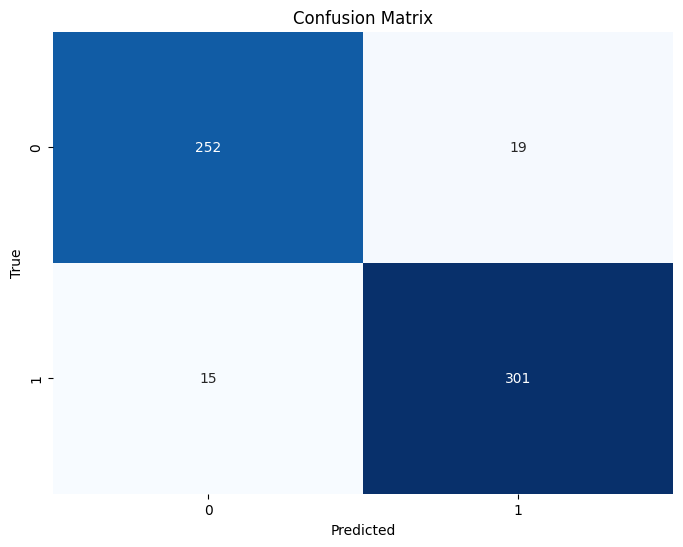

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,rf_y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

AdaBoost

In [ ]:
abc = AdaBoostClassifier(n_estimators=1000,
                         learning_rate=1)
model = abc.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
adaaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",adaaccuracy)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       271
           1       0.92      0.91      0.92       316

    accuracy                           0.91       587
   macro avg       0.91      0.91      0.91       587
weighted avg       0.91      0.91      0.91       587



<Axes: >

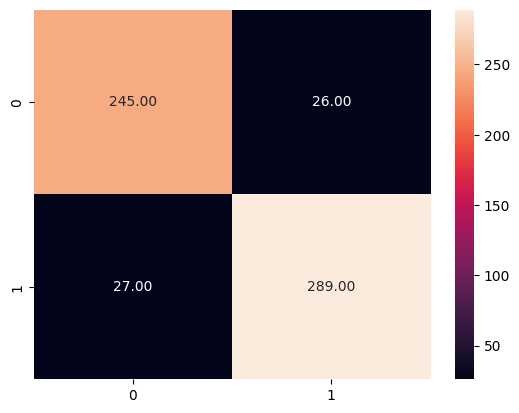

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

GradientBoost

In [ ]:
grad_model=GradientBoostingClassifier(learning_rate=1,n_estimators=100)
grad_model.fit(X_train,y_train)
predict=grad_model.predict(X_test)
gradacc=accuracy_score(predict,y_test)
print("The accuracy score of base model:",gradacc)

In [ ]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True)

Confusion matrix of base model:


array([[246,  23],
       [ 25, 293]])

In [ ]:
print("Classifiaction report of base model")
print(classification_report(predict,y_test))

Classifiaction report of base model
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       269
           1       0.93      0.92      0.92       318

    accuracy                           0.92       587
   macro avg       0.92      0.92      0.92       587
weighted avg       0.92      0.92      0.92       587



SVM

In [ ]:
svc_model = SVC(kernel='rbf',gamma=0.1)
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
svmacc=accuracy_score(y_pred,y_test)
print("The accuracy score of base model:",svmacc)

In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

Confusion matrix of base model:


array([[151,   6],
       [120, 310]])

In [ ]:
print("Classifiaction report of base model")
print(classification_report(y_pred,y_test))

Classifiaction report of base model
              precision    recall  f1-score   support

           0       0.56      0.96      0.71       157
           1       0.98      0.72      0.83       430

    accuracy                           0.79       587
   macro avg       0.77      0.84      0.77       587
weighted avg       0.87      0.79      0.80       587



Dtree

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
dtaccuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {dtaccuracy}")

Decision Tree Accuracy: 0.9045996592844975


In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

Confusion matrix of base model:


array([[240,  25],
       [ 31, 291]])

In [ ]:
print("Classifiaction report of base model")
print(classification_report(y_pred,y_test))

Classifiaction report of base model
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       265
           1       0.92      0.90      0.91       322

    accuracy                           0.90       587
   macro avg       0.90      0.90      0.90       587
weighted avg       0.90      0.90      0.90       587



KNN

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {knnaccuracy}")

KNN Accuracy: 0.787052810902896


In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

Confusion matrix of base model:


array([[204,  58],
       [ 67, 258]])

In [ ]:
print("Classifiaction report of base model")
print(classification_report(y_pred,y_test))

Classifiaction report of base model
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       262
           1       0.82      0.79      0.80       325

    accuracy                           0.79       587
   macro avg       0.78      0.79      0.79       587
weighted avg       0.79      0.79      0.79       587



Accuracy Plots

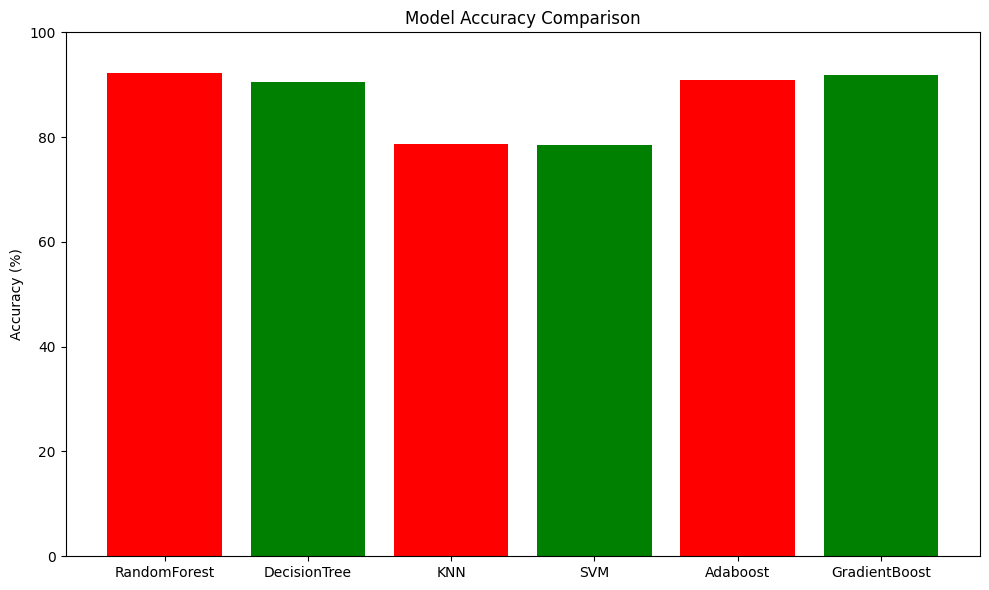

In [ ]:
models = ['RandomForest','DecisionTree', 'KNN','SVM', 'Adaboost', 'GradientBoost']
accuracies = [rf_accuracy,dtaccuracy, knnaccuracy,svmacc,adaaccuracy,gradacc]

accuracies_percentage = [acc * 100 for acc in accuracies]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_percentage, color=['red', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()